In [75]:
import warnings
import keplergl
import numpy as np
import osmnx as ox
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [76]:
mg_noIBX_log = pd.read_csv('/Users/turbold/Documents/CUSP/ADS/IBXRidership/mg_noIBX_log.csv', index_col=0).replace([np.inf, -np.inf], np.nan).fillna(0)
mg_IBX_log = pd.read_csv('/Users/turbold/Documents/CUSP/ADS/IBXRidership/mg_IBX_log.csv', index_col=0).replace([np.inf, -np.inf], np.nan).fillna(0)

In [158]:
#get the difference in centrality scores before and after the IBX
mg_IBX_log['cs_peak_diff'] = (mg_IBX_log['cs_ibx_peak'] - mg_IBX_log['cs_noibx_peak'])*1000

In [159]:
Voro_geom = gpd.read_file('/Users/turbold/Documents/CUSP/ADS/IBXRidership/PLUTO Data Processing/voronoi_ibx.geojson')

In [160]:
Voro_geom.reset_index(inplace=True)
Voro_geom = Voro_geom.rename(columns = {'index':'VoroID'})

Voro_geom.crs

<Derived Projected CRS: EPSG:32118>
Name: NAD83 / New York Long Island
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [161]:
mg_IBX_log.columns

Index(['complex_id', 'Stop Name', 'Complex_id', 'exits_weekday_evening',
       'entries_weekday_evening', 'exits_weekday_morning',
       'entries_weekday_morning', 'exits_weekday_overnight',
       'entries_weekday_overnight', 'exits_weekend_evening',
       'entries_weekend_evening', 'exits_weekend_morning',
       'entries_weekend_morning', 'exits_weekend_overnight',
       'entries_weekend_overnight', 'cs_ibx_peak', 'cs_ibx_offpeak',
       'cs_noibx_peak', 'cs_noibx_offpeak', 'VoroID', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
       'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
       'vacant_homes_num', 'Bus_Stops', 'geometry', 

In [162]:
IBX_log = Voro_geom.merge(mg_IBX_log, on='VoroID')

In [163]:
IBX_log

,VoroID,geometry_x,complex_id,Stop Name,Complex_id,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,...,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry_y,Complex ID,boro,lat,long,cs_peak_diff
0,0,"POLYGON ((318165.098 58718.185, 317190.134 643...",222,ROOSEVELT ISLAND,B06,7.885734,7.090243,7.677945,7.858109,5.073610,...,8.631949,8.539737,6.202536,0.000000,0,222,M,40.759002,-73.952861,-0.047989
1,0,"POLYGON ((318165.098 58718.185, 317190.134 643...",255,169 ST,F02,7.864141,6.865004,7.645230,7.997352,5.545373,...,9.594475,9.547760,6.507527,4.820282,POLYGON ((1043846.6598873622 192644.5784542074...,255,Q,40.710470,-73.793604,0.129885
2,0,"POLYGON ((318165.098 58718.185, 317190.134 643...",199,BROAD CHANNEL,H04,3.205791,3.722072,3.140914,4.644391,3.016760,...,6.884487,6.783325,4.543295,0.000000,0,199,Q,40.607879,-73.817478,0.113728
3,1,"POLYGON ((318165.098 58718.185, 317190.134 643...",254,JAMAICA-179 ST,F01,8.136621,7.485604,7.690686,9.044094,5.853566,...,11.973927,11.928449,8.860736,7.100852,POLYGON ((1043846.6598873622 192644.5784542074...,254,Q,40.712646,-73.783817,0.123499
4,2,"POLYGON ((315071.181 63329.288, 314195.643 635...",447,FLUSHING-MAIN ST,701,9.824535,9.048521,9.604900,9.867301,7.074096,...,11.587546,11.530171,8.700854,6.502790,POLYGON ((1033696.0337639538 207772.8402877239...,447,Q,40.759600,-73.830030,0.750735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,425,"POLYGON ((314983.849 46003.675, 314968.837 459...",202,BEACH 105 ST,H14,4.564348,3.610918,4.439116,4.229749,3.325036,...,0.000000,0.000000,0.000000,0.000000,POLYGON ((1033409.5104989398 150930.3900060479...,202,Q,40.583209,-73.827559,0.095830
429,426,"POLYGON ((318375.935 48818.728, 318378.874 488...",206,BEACH 44 ST,H08,5.864412,4.347370,5.475417,5.669622,3.863883,...,0.000000,0.000000,0.000000,0.000000,POLYGON ((1044538.379502035 160166.11099797013...,206,Q,40.592943,-73.776013,0.092640
430,427,"POLYGON ((314317.521 45745.523, 314303.619 457...",203,ROCKAWAY PARK-BEACH 116 ST,H15,5.649414,4.857096,5.429126,5.392377,4.258799,...,0.000000,0.000000,0.000000,0.000000,POLYGON ((1031223.3988037267 150083.4356078696...,203,Q,40.580903,-73.835592,0.092702
431,428,"POLYGON ((315613.546 46228.440, 315609.097 462...",201,BEACH 98 ST,H13,5.211397,4.364054,5.104126,4.948228,3.973588,...,0.000000,0.000000,0.000000,0.000000,"POLYGON ((1035475.442985017 151667.8069900886,...",201,Q,40.585307,-73.820558,0.098704


In [165]:
IBX_log = gpd.GeoDataFrame(IBX_log, geometry='geometry_x', crs="EPSG:32118")

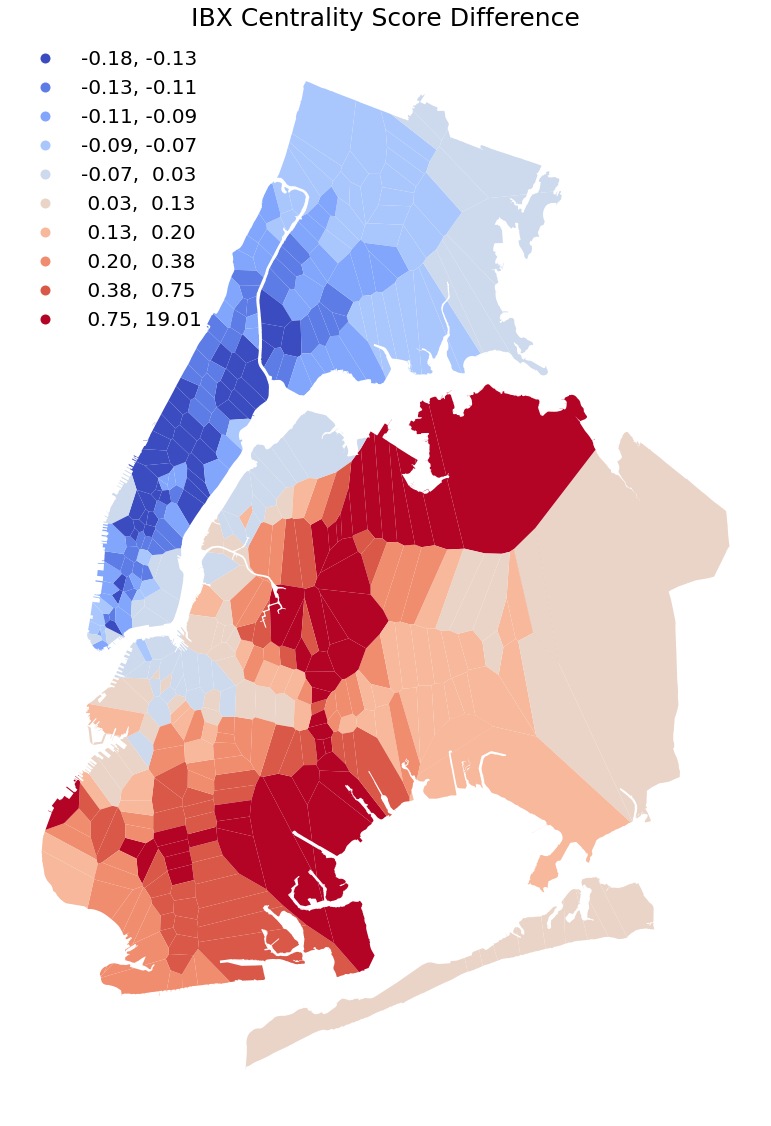

In [181]:
ax = IBX_log.plot(figsize=(15, 20), 
                  column="cs_peak_diff",
                  legend=True,
                  legend_kwds = {'fontsize':20, 'frameon':False, 'loc':'upper left'},
                  markersize=200,
                  cmap="coolwarm",
                  scheme='quantiles',
                  k=10,
                  )
ax.set_aspect('equal')
ax.axis('off')
plt.title("IBX Centrality Score Difference", fontsize=25)

plt.savefig('/Users/turbold/Documents/CUSP/ADS/IBXRidership/Data Vis/IBX Centrality Difference.png', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'IBX Centrality Score Difference')

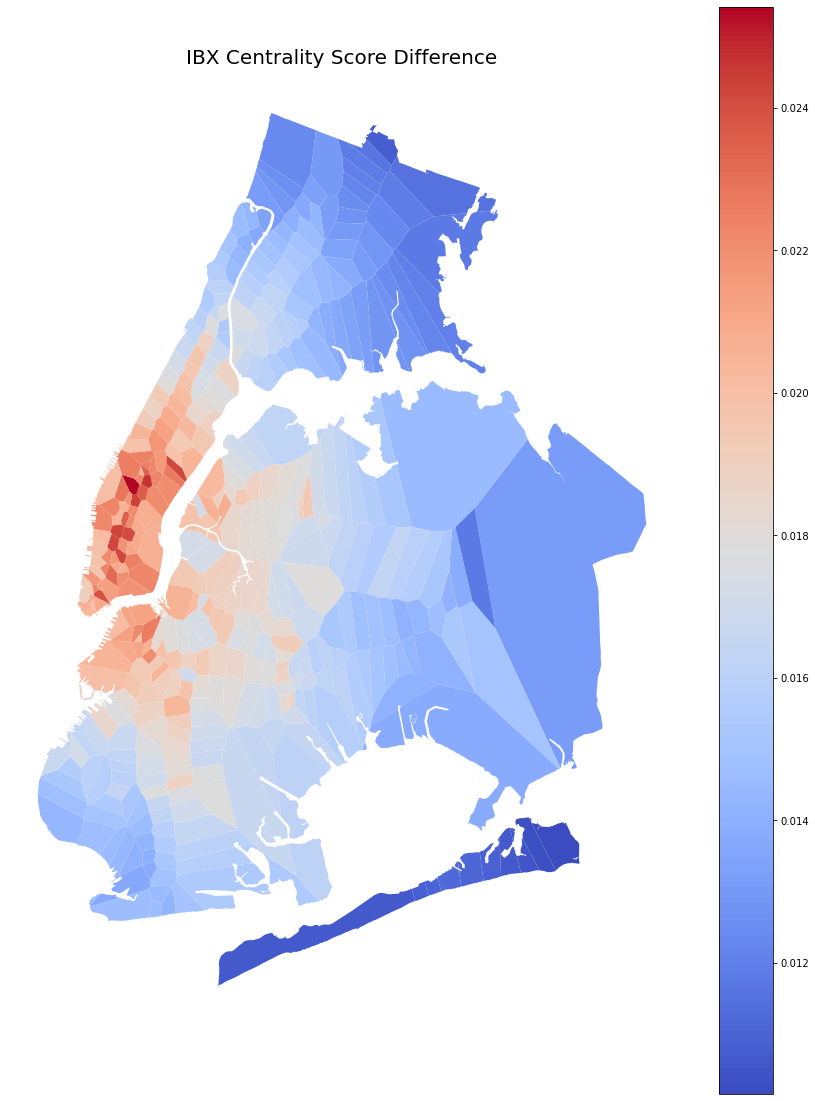

In [171]:
ax = IBX_log.plot(figsize=(15, 20), 
                  column="cs_ibx_peak",
                  legend=True,
                  #legend_kwds = {'fontsize':'large', 'frameon':False},
                  markersize=200,
                  cmap="coolwarm",
                  #scheme='quantiles',
                  #k=10,
                  )
ax.set_aspect('equal')
ax.axis('off')
plt.title("IBX Centrality Score Difference", fontsize=20)

#plt.savefig('/Users/turbold/Documents/CUSP/ADS/IBXRidership/Data Vis/IBX Centrality Difference.png')

Text(0.5, 1.0, 'IBX Centrality Score Difference')

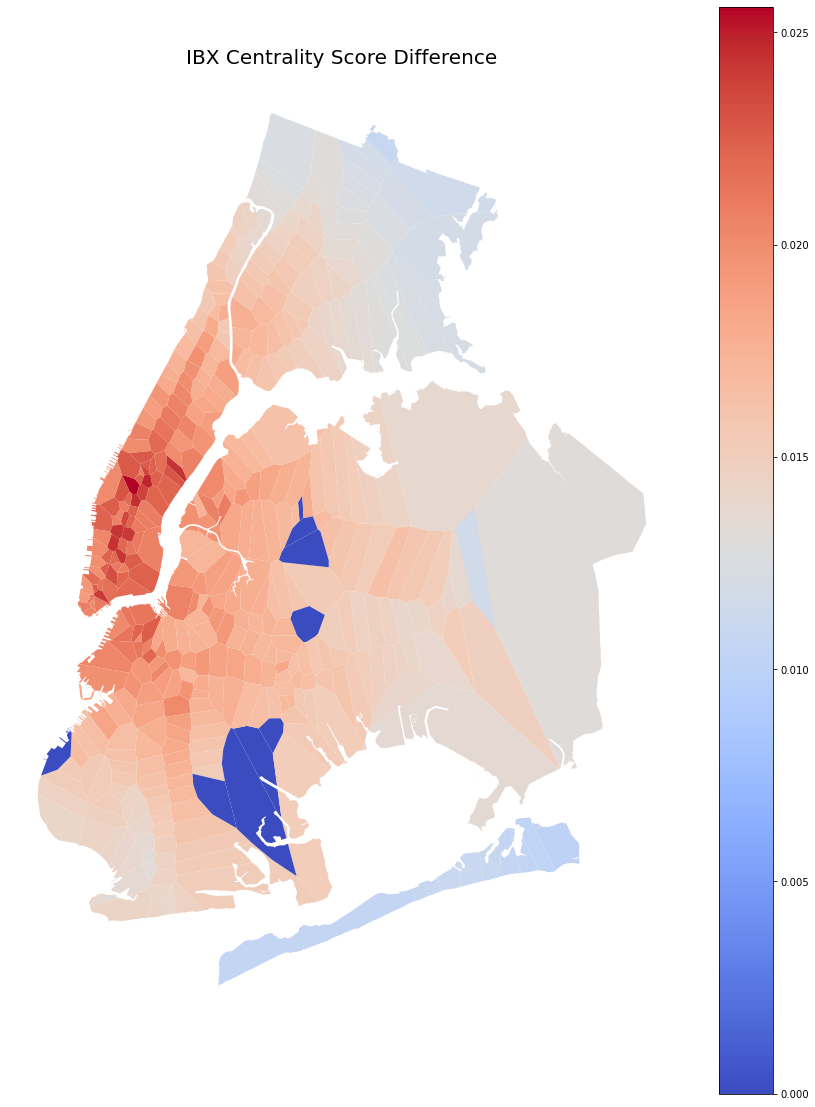

In [172]:
ax = IBX_log.plot(figsize=(15, 20), 
                  column="cs_noibx_peak",
                  legend=True,
                  #legend_kwds = {'fontsize':'large', 'frameon':False},
                  markersize=200,
                  cmap="coolwarm",
                  #scheme='quantiles',
                  #k=10,
                  )
ax.set_aspect('equal')
ax.axis('off')
plt.title("IBX Centrality Score Difference", fontsize=20)

#plt.savefig('/Users/turbold/Documents/CUSP/ADS/IBXRidership/Data Vis/IBX Centrality Difference.png')